In [1]:
from matplotlib import pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis.msd import EinsteinMSD
import numpy as np

/ext3/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
# read the trajectory
traj = mda.Universe('../Setup/NaCl/gromacs/step5_10.gro',
                    '../Setup/NaCl/gromacs/nojump_traj.xtc')

/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/XDR.py:237: UserWarning: Reload offsets from trajectory
 ctime or size or n_atoms did not match
  warnings.warn("Reload offsets from trajectory\n "


In [9]:
# select the atoms and calculate the MSD
water_oxygens = traj.select_atoms('name OH2')
water_oxygens = EinsteinMSD(water_oxygens, msd_type='xyz', fft=True).run()
water_oxygens_msd = water_oxygens.results.timeseries

sodium = traj.select_atoms('name SOD')
sodium = EinsteinMSD(sodium, msd_type='xyz', fft=True).run()
sodium_msd = sodium.results.timeseries

chloride = traj.select_atoms('name CLA') 
chloride = EinsteinMSD(chloride, msd_type='xyz', fft=True).run()
chloride_msd = chloride.results.timeseries

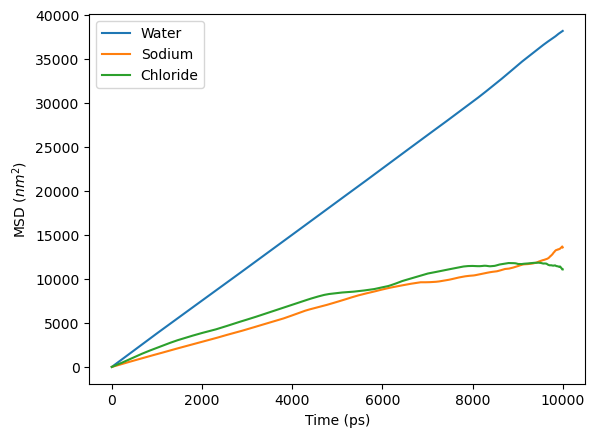

In [10]:
def plot_mda_vs_time(mda, time, legend):
    plt.plot(time, mda, label=legend)
    plt.xlabel('Time (ps)')
    plt.ylabel(r'MSD ($nm^{2}$)')
    plt.legend()

plot_mda_vs_time(water_oxygens_msd, list(range(0, 10010, 10)), 'Water')
plot_mda_vs_time(sodium_msd, list(range(0, 10010, 10)), 'Sodium')
plot_mda_vs_time(chloride_msd, list(range(0, 10010, 10)), 'Chloride')
plt.savefig('NaCL_water_msd.png', dpi=300)